# Cardiac Arrest Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# 1. load dataset

In [15]:
df = pd.read_csv('Cardiac Arrest Analysis.csv')

# 2. check null values

In [16]:
df.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

# 3. print information about dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

# 4. Describe dataset in statistic form

In [18]:
df.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


# 5. drop underrisk column

In [20]:
df_1 = df.drop('UnderRisk',axis=1)

# 1. Apply Kmean clustering on dataset 

In [21]:
from sklearn.cluster import KMeans


In [22]:
cls = KMeans(n_clusters = 2, )
cls.fit(df_1)

KMeans(n_clusters=2)

# 2. check the wcss score

In [23]:
wcss = cls.inertia_
wcss

645.4620853080565

# 3 . try different n and find wcss score

In [24]:
#create empty list
wcss = []
#select k value from 1 to 10
for i in range(1, 11):
    cls = KMeans(n_clusters = i, random_state = 42)
    cls.fit(df_1)
    # inertia method returns wcss for that model
    wcss.append(cls.inertia_)

# 4. plot all wcss score

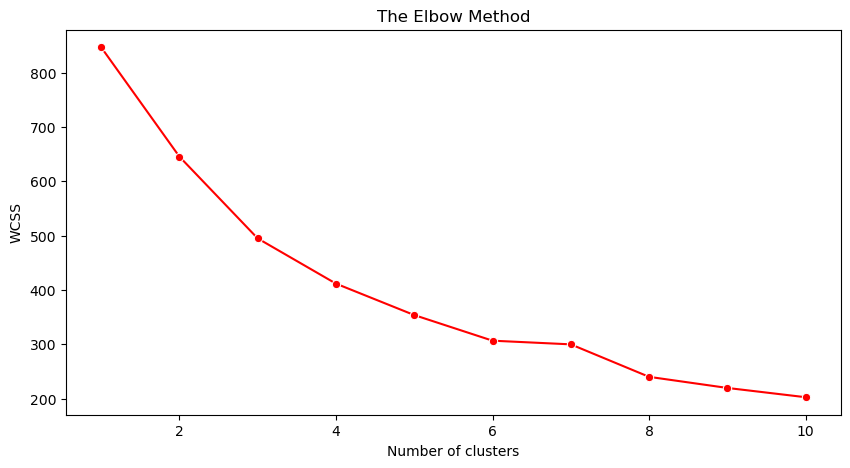

In [35]:
range_values = range(1, 11)  
wcss

plt.figure(figsize=(10, 5))
sns.lineplot(x=range_values, y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# 5 Try again kmeans with best no. cluster according wo wcss score

In [36]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_1)



In [37]:
y_kmeans

array([5, 2, 2, 2, 4, 1, 0, 1, 2, 0, 2, 1, 3, 2, 2, 2, 1, 2, 5, 2, 2, 2,
       5, 1, 2, 5, 2, 0, 2, 2, 1, 5, 1, 5, 1, 2, 2, 1, 2, 2, 2, 1, 3, 1,
       2, 1, 1, 2, 1, 4, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 5, 1, 2, 3, 2, 2, 2, 5, 3, 2, 5, 5, 3, 1, 0, 2, 1, 2, 5,
       3, 2, 5, 1, 5, 2, 2, 2, 3, 2, 5, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       5, 2, 3, 2, 2, 1, 1, 2, 1, 0, 4, 3, 2, 1, 0, 2, 2, 3, 5, 1, 3, 3,
       3, 2, 2, 5, 1, 1, 1, 2, 3, 2, 2, 1, 1, 2, 2, 5, 4, 2, 5, 2, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 5, 0, 5, 3, 1, 1, 1, 0, 3, 2, 3, 2, 2, 2, 2,
       2, 5, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 5, 1, 2, 2, 1, 1, 2, 2, 2, 3,
       3, 2, 1, 1, 5, 1, 1, 5, 5, 2, 1, 0, 2, 1, 2, 2, 3, 2, 1, 2, 2, 2,
       5, 2, 2, 4, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 5, 4, 3, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 5, 2, 1, 5, 2, 1, 2, 2, 2, 2,
       2, 5, 1, 2, 5, 1, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 2, 5, 2, 0, 2,
       2, 2, 3, 1, 1, 2, 2, 2, 5, 1, 2, 3, 1, 1, 2,

# 6. print cluster centers 

In [38]:
kmeans.cluster_centers_

array([[ 1.38888889e+00,  4.16333634e-17,  1.00000000e+00,
         8.33333333e-02,  0.00000000e+00,  2.77777778e-02,
         2.77777778e-02,  1.00000000e+00,  1.00000000e+00,
        -3.46944695e-18,  2.77777778e-02,  5.55555556e-02],
       [ 2.00000000e+00, -9.71445147e-17,  9.28251121e-01,
         4.93273543e-02,  1.00000000e+00,  3.13901345e-02,
        -3.46944695e-17,  4.48430493e-03,  9.59641256e-01,
         0.00000000e+00,  4.48430493e-03,  3.58744395e-02],
       [ 9.59619952e-01,  2.22044605e-16,  1.00000000e+00,
         8.31353919e-02,  1.00000000e+00,  7.83847981e-02,
        -4.16333634e-17, -1.52655666e-16,  9.80997625e-01,
         2.85035629e-02,  1.66270784e-02,  3.56294537e-02],
       [ 9.42857143e-01,  1.38777878e-17,  1.11022302e-16,
         1.71428571e-01,  1.00000000e+00,  2.85714286e-02,
         1.42857143e-02,  0.00000000e+00,  8.42857143e-01,
        -6.93889390e-18,  7.14285714e-02,  2.85714286e-02],
       [ 1.00000000e+00,  1.11111111e-01,  1.9444444

# 7. create column cluster for predicted labels value

In [39]:
df_1['cluster']=  y_kmeans
df_1.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster
0,1,1,1,0,1,0,0,0,1,0,0,0,5
1,1,0,1,0,1,0,0,0,1,0,0,0,2
2,1,0,1,0,1,0,0,0,1,0,0,0,2
3,1,0,1,0,1,0,0,0,1,0,0,0,2
4,1,0,0,0,0,0,1,1,0,0,0,0,4


# 8. Plot the hierarchical clustering using scipy 

In [40]:
df_h = df.drop('UnderRisk',axis=1)

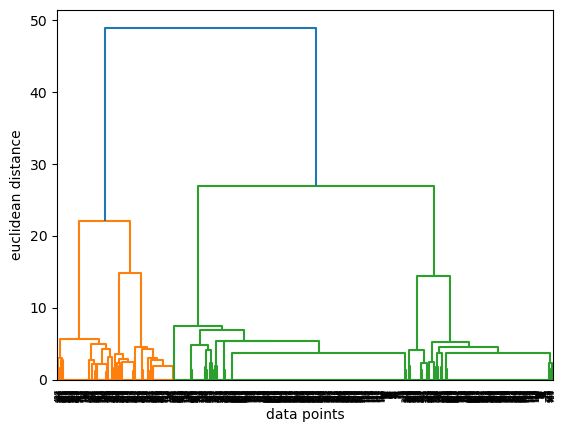

In [41]:
#The following linkage methods are used to compute the distance between two clusters 
# method='ward' uses the Ward variance minimization algorithm
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df_1, method = "ward")
#Plot the hierarchical clustering as a dendrogram.
#leaf_rotation : double, optional Specifies the angle (in degrees) to rotate the leaf labels.

dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

# 9. Apply AgglomerativeClustering using number of cluster

In [42]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df_h)

# 10. create label column for predicted cluster label

In [44]:
df_h["label"] = cluster

In [45]:
df_h.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,label
0,1,1,1,0,1,0,0,0,1,0,0,0,2
1,1,0,1,0,1,0,0,0,1,0,0,0,1
2,1,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,1,0,0,0,0,0


# 11 .show label counts 

In [46]:
df_h.label.value_counts()


1    412
5    191
4     91
0     72
3     63
2     60
Name: label, dtype: int64

# 12 . show a silhouette score

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
score_agg = silhouette_score(df_h, cluster)
score_agg

0.6832654795236572